Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [1]:
! pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00


In [65]:
!pip install path

In [66]:
import os
from PIL import Image
from path import Path
from fastai.data.all import *
from fastai.vision.all import *
import timm

In [83]:
!pip install keras


Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

# Cement Strength Regression

In [30]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

**EDA**

<Axes: >

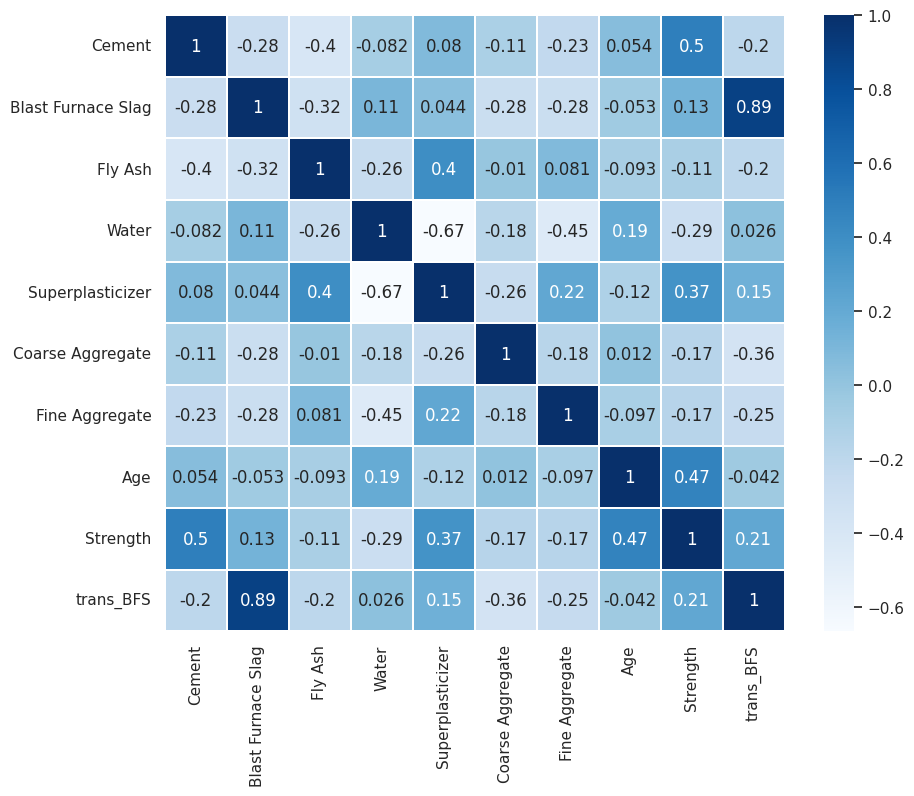

In [55]:
colormap = plt.cm.Blues
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.2)

<Figure size 2000x2000 with 0 Axes>

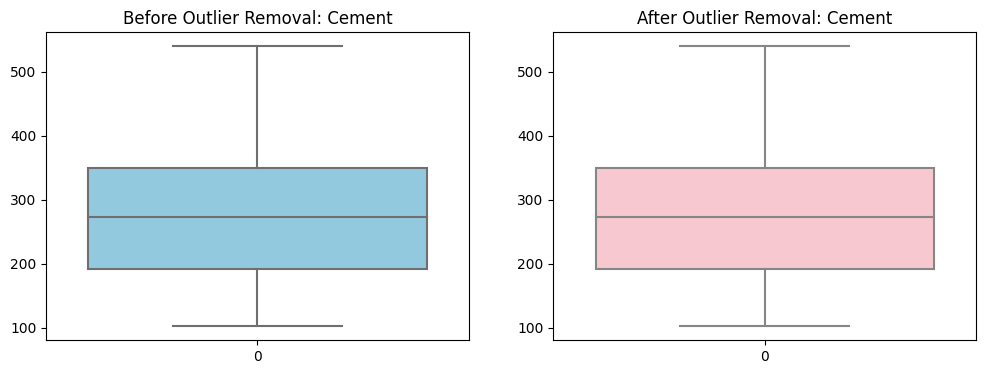

<Figure size 2000x2000 with 0 Axes>

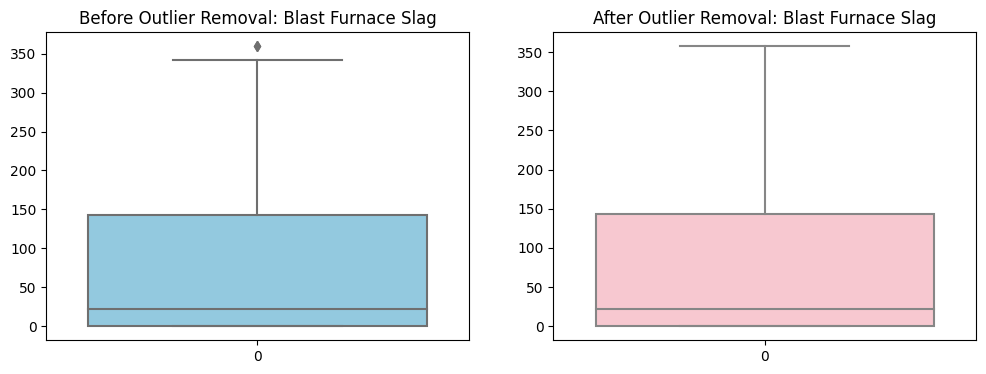

<Figure size 2000x2000 with 0 Axes>

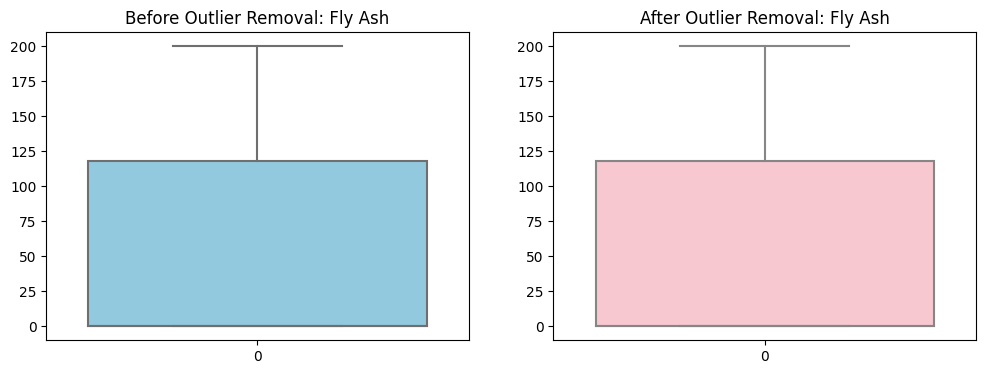

<Figure size 2000x2000 with 0 Axes>

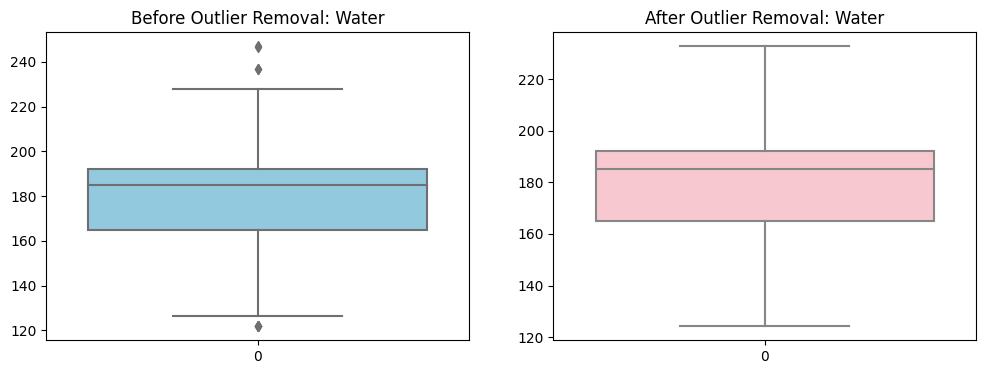

<Figure size 2000x2000 with 0 Axes>

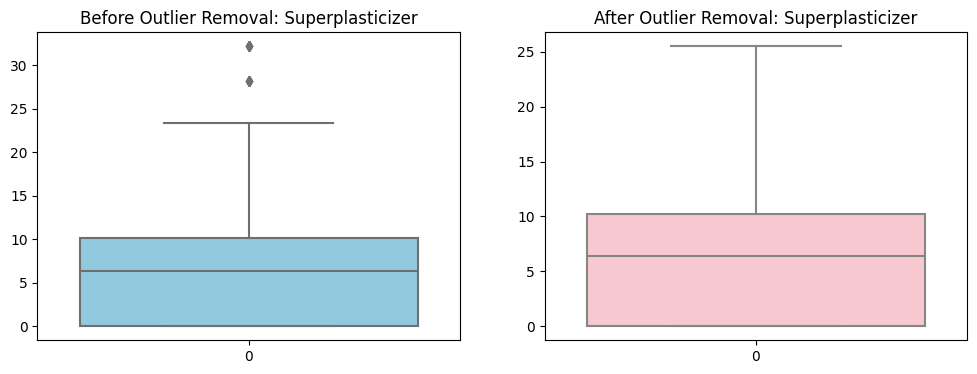

<Figure size 2000x2000 with 0 Axes>

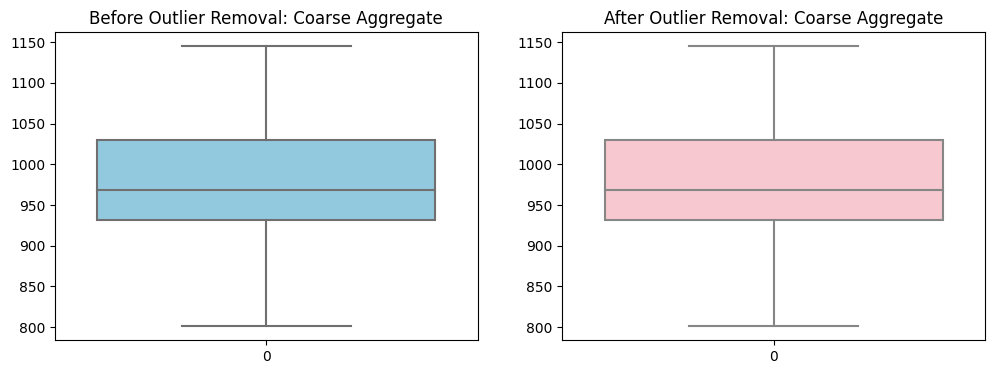

<Figure size 2000x2000 with 0 Axes>

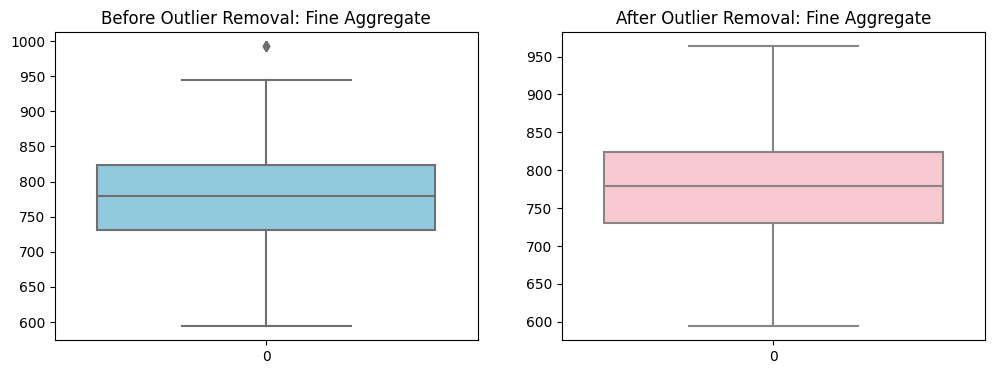

<Figure size 2000x2000 with 0 Axes>

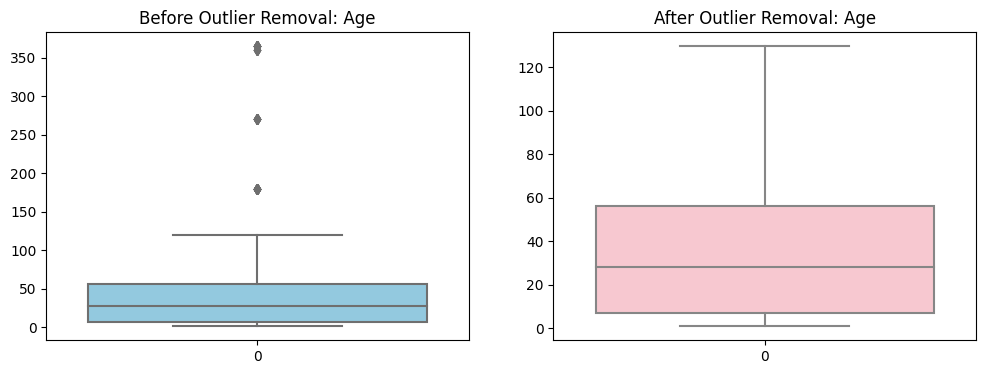

<Figure size 2000x2000 with 0 Axes>

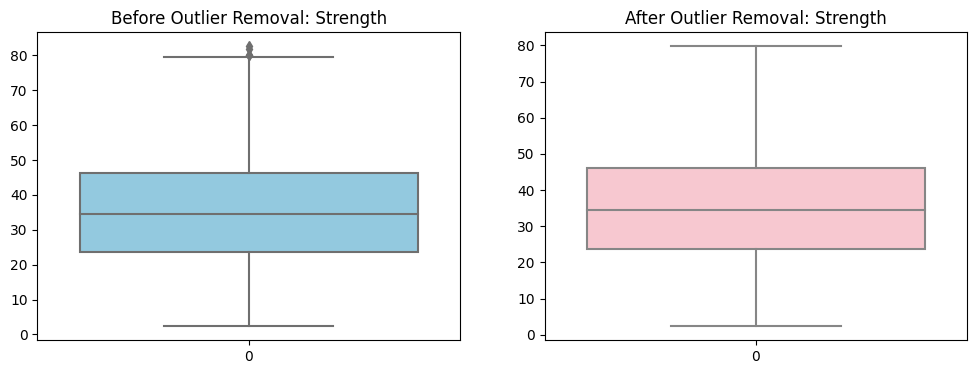

In [31]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()

    return df
for col in df.select_dtypes(exclude="object").columns[ : ]:
  df = remove_outlier(df,col)

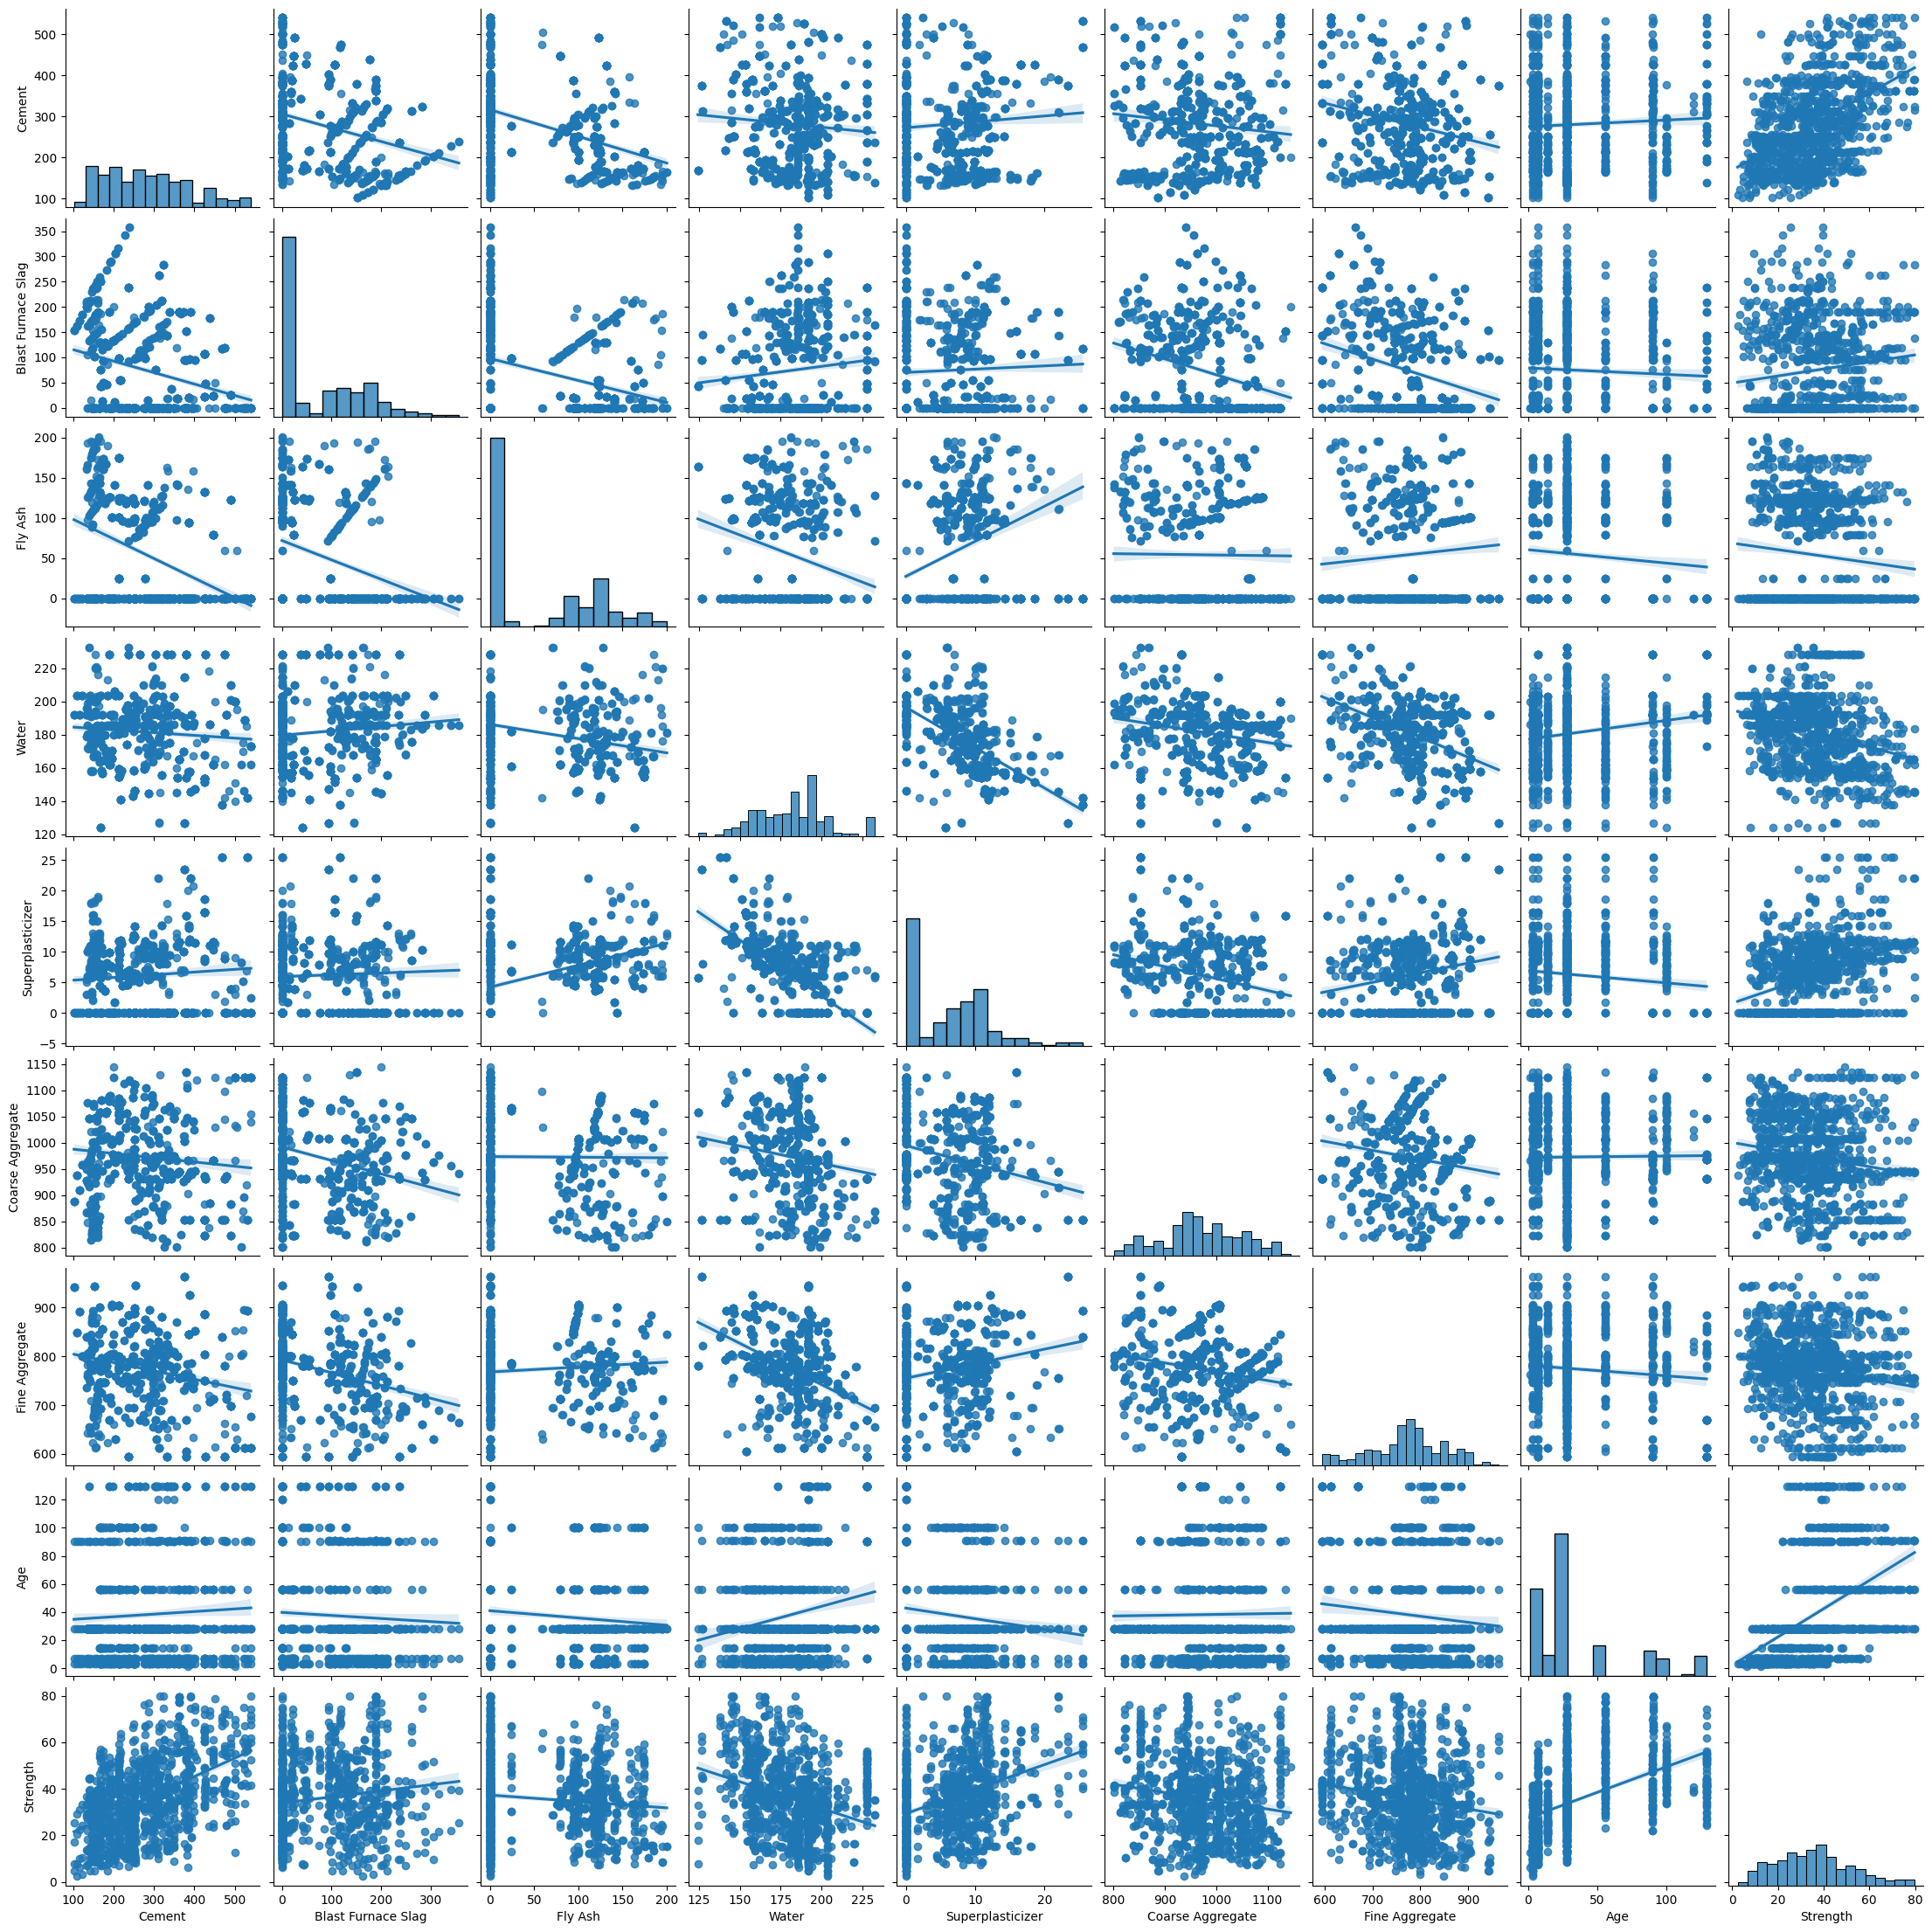

In [35]:
fig = sns.pairplot(df, kind = "reg")

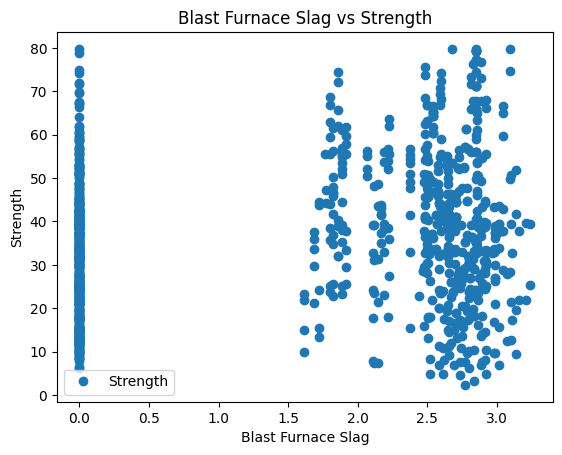

,trans_BFS,Strength
trans_BFS,1.00000,0.21359
Strength,0.21359,1.00000


In [36]:
df['trans_BFS'] = np.power(df['Blast Furnace Slag'],0.2)
df.plot(x='trans_BFS', y='Strength', style='o')
plt.title('Blast Furnace Slag vs Strength')
plt.xlabel('Blast Furnace Slag')
plt.ylabel('Strength')
plt.show()
df[['trans_BFS','Strength']].corr()

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop('Strength', axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [69]:
X_train.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,trans_BFS
Cement,1.000000,-0.292475,-0.408276,-0.079584,0.065404,-0.089068,-0.231379,0.060659,-0.221676
Blast Furnace Slag,-0.292475,1.000000,-0.315825,0.091103,0.057300,-0.287762,-0.253382,-0.038667,0.889914
Fly Ash,-0.408276,-0.315825,1.000000,-0.248346,0.381179,0.000601,0.071712,-0.108602,-0.195519
Water,-0.079584,0.091103,-0.248346,1.000000,-0.661905,-0.167148,-0.432942,0.183405,0.015196
Superplasticizer,0.065404,0.057300,0.381179,-0.661905,1.000000,-0.259059,0.211338,-0.111710,0.165286
Coarse Aggregate,-0.089068,-0.287762,0.000601,-0.167148,-0.259059,1.000000,-0.214891,0.004812,-0.363557
Fine Aggregate,-0.231379,-0.253382,0.071712,-0.432942,0.211338,-0.214891,1.000000,-0.089482,-0.215465
Age,0.060659,-0.038667,-0.108602,0.183405,-0.111710,0.004812,-0.089482,1.000000,-0.026624
trans_BFS,-0.221676,0.889914,-0.195519,0.015196,0.165286,-0.363557,-0.215465,-0.026624,1.000000


<Axes: xlabel='Cement', ylabel='Strength'>

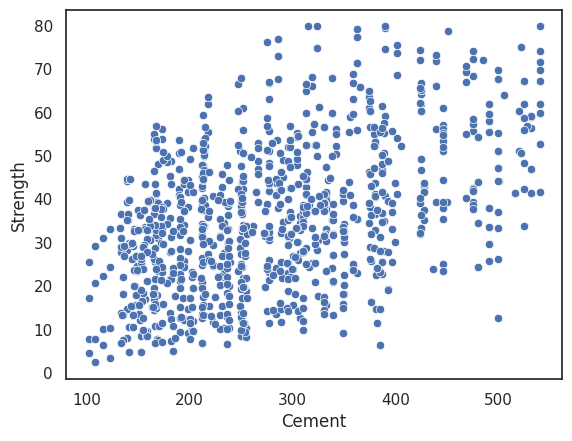

In [70]:
import seaborn as sns

sns.scatterplot(x='Cement', y='Strength', data=df)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression Score:', lr.score(X_test, y_test))

Linear Regression Score: 0.7479242558522738


In [75]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
print('Ridge Regression Score:', ridge.score(X_test, y_test))

Ridge Regression Score: 0.7479210361057032


In [89]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,trans_BFS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,0.000000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,0.000000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,2.696267
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,2.696267
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,2.656915
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,2.587567
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,0.000000
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,2.684433
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,2.845960


In [87]:
y

0       79.7725
1       61.8900
2       40.2700
3       41.0500
4       44.3000
         ...   
1025    44.2800
1026    31.1800
1027    23.7000
1028    32.7700
1029    32.4000
Name: Strength, Length: 1030, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn import metrics

print(metrics.r2_score(y_test,regressor.predict(X_test)))

0.7169850319982559


In [57]:
df_columns = df.columns

In [58]:
pred = df[df_columns[df_columns!="Strength"]]
targ = df["Strength"]

In [59]:
targ.head()

0    79.7725
1    61.8900
2    40.2700
3    41.0500
4    44.3000
Name: Strength, dtype: float64

In [60]:
pred_normal = ((pred - pred.mean())/pred.std())
pred_normal.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,trans_BFS
0,2.476712,-0.856555,-0.846733,-0.920763,-0.630600,0.862735,-1.220813,-0.281435,-1.065738
1,2.476712,-0.856555,-0.846733,-0.920763,-0.630600,1.055651,-1.220813,-0.281435,-1.065738
2,0.491187,0.795305,-0.846733,2.188770,-1.061452,-0.526262,-2.248185,2.555165,0.982455
3,0.491187,0.795305,-0.846733,2.188770,-1.061452,-0.526262,-2.248185,2.555165,0.982455
4,-0.790075,0.678226,-0.846733,0.492661,-1.061452,0.070492,0.652261,2.555165,0.952561


In [61]:
n_cols = pred_normal.shape[1]

In [62]:
def regression_model():
    model = Sequential()
    model.add(Dense(50,activation = "relu",input_shape = (n_cols,)))
    model.add(Dense(50,activation ="relu"))
    model.add(Dense(50,activation ="relu"))
    model.compile(optimizer = "adam", loss = "mean_squared_error")

    return model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100)
model.evaluate(X_test, y_test)

Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 3584.5942
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 520.0269
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 173.5997
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 118.9292
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 119.0664
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 108.2620
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 92.7709
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 85.2807
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 83.6687
Epoch 10/100
26/26 [==============================] - 0s 5ms/step - loss: 86.6818
Epoch 11/100
26/26 [==============================] - 0s 5ms/step - loss: 80.9611
Epoch 12/100
26/26 [==============================] - 0s 4ms/step - loss: 79.8338
Epoch 13/100
26/26

40.713985443115234

**Loss: 40.713985443115234**